# This script demonstrates the k-means algorithm
# Name : Sunjun Hwang
# Student ID : 20151766
# github link : https://github.com/tjswns494/Mathematical-Foundations-for-Computer-Vision-and-Machine-Learning-assignment.git


# import packages for plotting images and manipulating data:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure
import math

# read image and turn to gray image

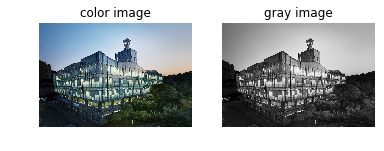

In [2]:
file_image	= 'cau.jpg'

im_color 	= io.imread(file_image)
im_gray  	= color.rgb2gray(im_color)

p1 = plt.subplot(1,2,1)
p1.set_title('color image')
plt.imshow(im_color)
plt.axis('off')

p2 = plt.subplot(1,2,2)
p2.set_title('gray image')
plt.imshow(im_gray, cmap='gray')
plt.axis('off')

plt.show()

# derivative in x,y direction

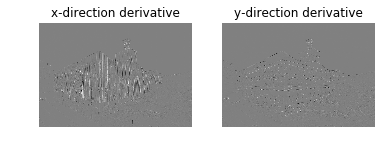

In [3]:
x_ker 		= np.array([[0,0,0],[1,-1,0],[0,0,0]]) 
x_im_conv		= signal.convolve2d(im_gray, x_ker, boundary='symm', mode='same') 

y_ker 		= np.array([[0,1,0],[0,-1,0],[0,0,0]]) 
y_im_conv		= signal.convolve2d(im_gray, y_ker, boundary='symm', mode='same') 

p3 = plt.subplot(1,2,1)
p3.set_title('x-direction derivative')
plt.imshow(x_im_conv, cmap='gray')
plt.axis('off')

p4 = plt.subplot(1,2,2)
p4.set_title('y-direction derivative')
plt.imshow(y_im_conv, cmap='gray')
plt.axis('off')

plt.show()

# define gradient of image

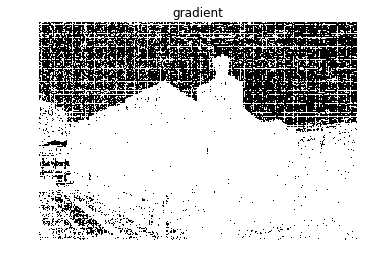

In [4]:
def gradient(x,y):
    gradient  = np.empty((len(x), len(x[0])),dtype=int)
    for i in range(0,len(x),1):
        for j in range(0,len(x[0]),1):
            if(x[i][j]==0 and y[i][j]==0):
                gradient[i][j]=0
            else:
                gradient[i][j]=(abs(x[i][j])+abs(y[i][j]))/(x[i][j]**2+y[i][j]**2)**0.5
    return gradient

gradient=gradient(x_im_conv,y_im_conv)
p5 = plt.subplot(1,1,1)
p5.set_title('gradient')
plt.imshow(gradient, cmap='gray')
plt.axis('off')

plt.show()

# define magnitude of gradient

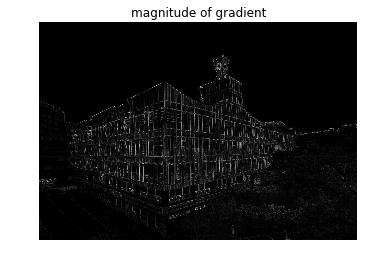

In [5]:
def magnitude(x,y):
    magnitude= np.empty((len(x), len(x[0])),dtype=float)
    for i in range(0,len(x),1):
        for j in range(0,len(x[0]),1):
            magnitude[i][j]=(x[i][j]**2+y[i][j]**2)**0.5
    return magnitude

magnitude=magnitude(x_im_conv,y_im_conv)
p6 = plt.subplot(1,1,1)
p6.set_title('magnitude of gradient')
plt.imshow(magnitude, cmap='gray')
plt.axis('off')

plt.show()

# define direction of gradient

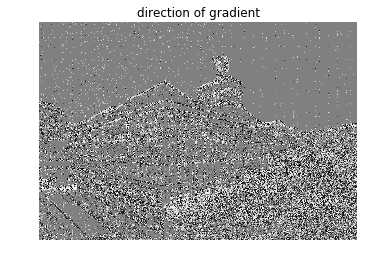

In [6]:
def direction(x,y):
    direction= np.empty((len(x), len(x[0])),dtype=float)
    for i in range(0,len(x),1):
        for j in range(0,len(x[0]),1):
            if(x[i][j]==0):
                direction[i][j]=0
            else:
                direction[i][j]=math.atan(y[i][j]/x[i][j])
    return direction

direction=direction(x_im_conv,y_im_conv)
p7 = plt.subplot(1,1,1)
p7.set_title('direction of gradient')
plt.imshow(direction, cmap='gray')
plt.axis('off')

plt.show()

# define smoothing kernel

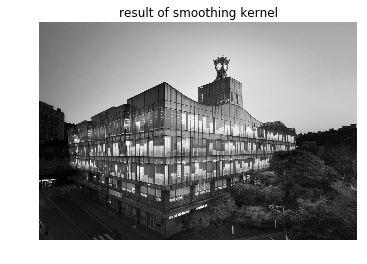

In [7]:
smooth_ker		= np.array([[0,1/5,0],[1/5,3/5,1/5],[0,1/5,0]]) 
smooth_im_conv		= signal.convolve2d(im_gray, smooth_ker, boundary='symm', mode='same') 

p8 = plt.subplot(1,1,1)
p8.set_title('result of smoothing kernel')
plt.imshow(smooth_im_conv, cmap='gray')
plt.axis('off')

plt.show()

# define own kernel

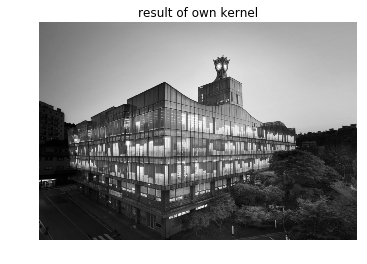

In [8]:
own_ker		= np.array([[0,0,1/5,0,0],[0,0,1/5,0,0],[1/5,1/5,1/5,1/5,1/5],[0,0,1/5,0,0],[0,0,1/5,0,0]]) 
own_im_conv		= signal.convolve2d(im_gray, own_ker, boundary='symm', mode='same') 
p8 = plt.subplot(1,1,1)
p8.set_title('result of own kernel')
plt.imshow(own_im_conv, cmap='gray')
plt.axis('off')

plt.show()